Notes for XGBOOST

- No feature scaling → XGBoost doesn’t need it.

- No need to drop multicollinear features → trees handle it naturally.

- Default hyperparameters already give strong performance.

Later we do:

- Tune max_depth, learning_rate, n_estimators.

- Use early_stopping_rounds with a validation set.

- Check feature importance with xgb.feature_importances_.

In [5]:
# 1. Imports

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor


# 2. Load datasets (feature engineered, leakage-safe)

train_df = pd.read_csv("/Users/champagnepuppy/de-projects/Housing_Price_ML_E2E/data/processed/feature_engineered_train.csv")
eval_df = pd.read_csv("/Users/champagnepuppy/de-projects/Housing_Price_ML_E2E/data/processed/feature_engineered_eval.csv")

# 3. Define target & features

target = "price"

X_train = train_df.drop(columns=[target])
y_train = train_df[target]

X_eval = eval_df.drop(columns=[target])
y_eval = eval_df[target]

print("Train shape:", X_train.shape)
print("Eval shape:", X_eval.shape)


# 4. Train a simple XGBoost Regressor

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)


# 5. Evaluate performance

y_pred = xgb_model.predict(X_eval)

mae = mean_absolute_error(y_eval, y_pred)
rmse = np.sqrt(mean_squared_error(y_eval, y_pred))
r2 = r2_score(y_eval, y_pred)

print("XGBoost Performance:")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²: {r2:.4f}")


Train shape: (578878, 39)
Eval shape: (148697, 39)
XGBoost Performance:
MAE: 32,644.96
RMSE: 70,898.75
R²: 0.9611


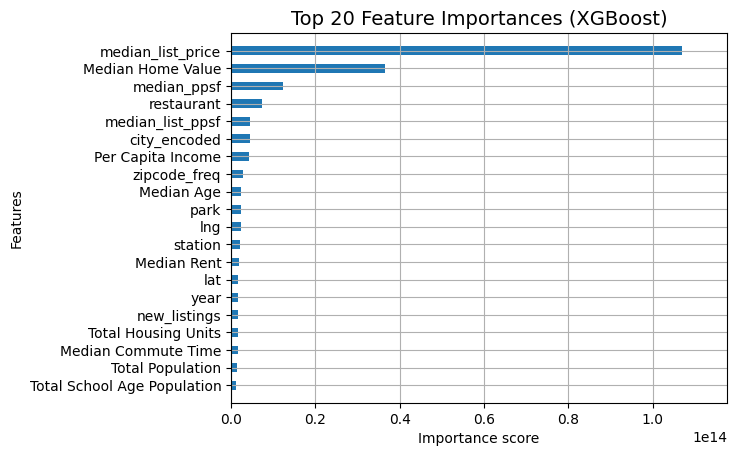

In [7]:
# Plot importances
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(
    xgb_model,
    importance_type="gain",
    max_num_features=20,
    height=0.5,
    show_values=False
)
plt.title("Top 20 Feature Importances (XGBoost)", fontsize=14)
plt.show()